#**Imports and Helper function**

In [ ]:
# Imports and formatting the data
# See previous lab if this is confusing
from matplotlib import pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import LeakyReLU

num_classes = 10
image_size = 784

(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_data = training_images.reshape(training_images.shape[0], image_size)
test_data = test_images.reshape(test_images.shape[0], image_size)

training_labels = to_categorical(training_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# function to plot training information:
def plot_training_history(history, model):
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='best')

    plt.show()

    loss, accuracy  = model.evaluate(test_data, test_labels, verbose=False)
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

11490434/11490434 [==============================] - 1s 0us/step


#**Starter model**
###Note that the model is built by adding dense layers in a loop

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 10)                110       
                                                                 
 dense_3 (Dense)             (None, 10)                110       
                                                                 
 dense_4 (Dense)             (None, 10)                110       
                                                                 
 dense_5 (Dense)             (None, 10)                110       
                                                                 
 dense_6 (Dense)             (None, 10)                1

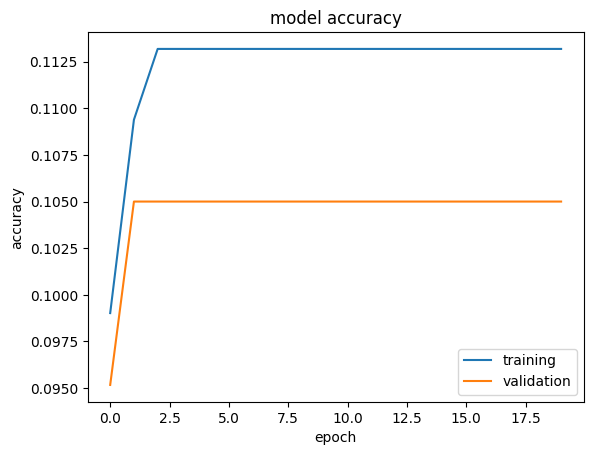

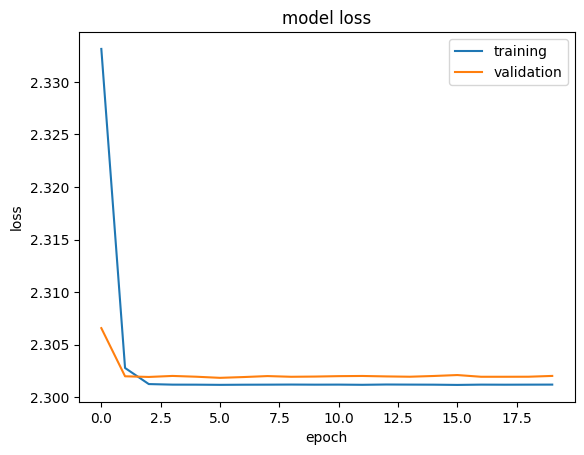

Test loss: 2.3
Test accuracy: 0.113


In [ ]:
model = Sequential()
model.add(Dense(units=10, activation='sigmoid', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='sigmoid'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

In [ ]:
#Question #1
#What is the test accuracy of the starter model?
model.evaluate(test_data, test_labels)

313/313 [==============================] - 1s 4ms/step - loss: 2.3010 - accuracy: 0.1135


[2.3009746074676514, 0.11349999904632568]

In [ ]:
loss, accuracy = model.evaluate(test_data, test_labels)
print("Test Accuracy = ", accuracy)
print("Test loss = ", loss)

313/313 [==============================] - 2s 6ms/step - loss: 2.3010 - accuracy: 0.1135
Test Accuracy =  0.11349999904632568
Test loss =  2.3009746074676514


In [ ]:
#Question #2
#Why is the accuracy of the starter model so poor?


This model used sigmoid activation function in each layer and can lead to vanishing gradient problem. they can saturate to extreme values, causing gradient to become close to zero during backpropagation.
This model cosnists of 11 hidden layers with same configuration and may not able to capture data complexity.
we used sgd with default learning rate. It may not be optimal for this dataset.

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                7850      
                                                                 
 dense_13 (Dense)            (None, 10)                110       
                                                                 
 dense_14 (Dense)            (None, 10)                110       
                                                                 
 dense_15 (Dense)            (None, 10)                110       
                                                                 
 dense_16 (Dense)            (None, 10)                110       
                                                                 
 dense_17 (Dense)            (None, 10)                110       
                                                                 
 dense_18 (Dense)            (None, 10)               

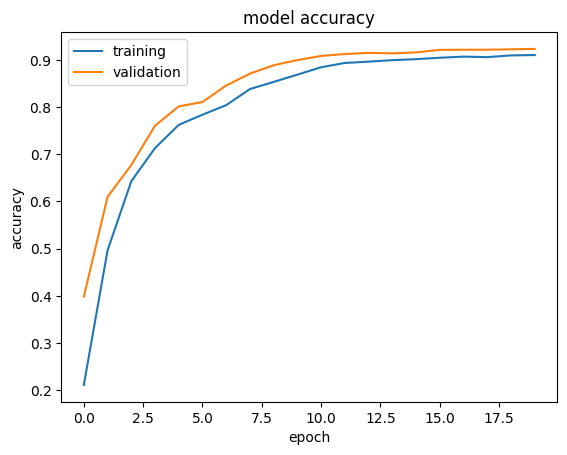

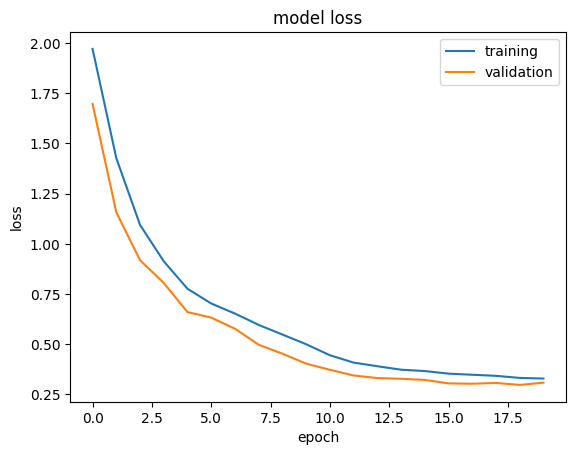

Test loss: 0.342
Test accuracy: 0.909


In [ ]:
#Question #3
#Rewrite the code of the starter model so that it uses the ReLU activation function instead of the sigmoid function.
# Show your code in the less below and rerun the training.
model = Sequential()
model.add(Dense(units=10, activation='relu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='relu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [ ]:
#Question #4
#What is the test accuracy of the model using ReLU activation? Comment on the results: Is it better or worse than the previous model?

The test accuracy of the model using Relu activation is 0.909 which is better than previous model's accuracy (0.11) that used sigmoid activation function.

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 10)                7850      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_39 (Dense)            (None, 10)                110       
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_40 (Dense)            (None, 10)                110       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 10)                0         
                                                                 
 dense_41 (Dense)            (None, 10)               

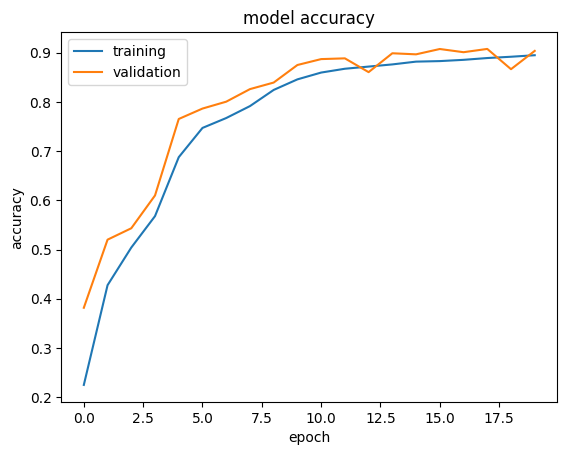

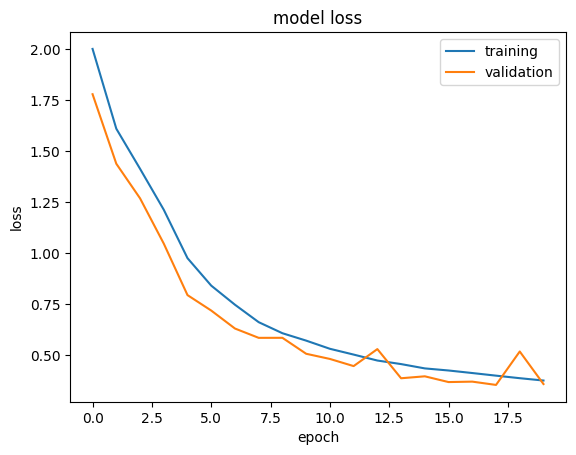

Test loss: 0.398
Test accuracy: 0.888


In [ ]:
#Question #5
#Rewrite the code of the starter model so that it uses a leaky ReLU activation function (alpha = 0.01) instead of the sigmoid function.
# Show your code in the less below and rerun the training.
model = Sequential()
model.add(Dense(units=10, input_shape=(image_size,)))
model.add(LeakyReLU(alpha=0.01))
for _ in range(10):
    model.add(Dense(units=10))
    model.add(LeakyReLU(alpha=0.01))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [ ]:
#Question #6
#What is the test accuracy of the model using leaky ReLU activation? Comment on the results: Is it better or worse than previous models?

The model with leaky relu activation gave test accuracy of 0.888. This model performed little worse than the model using relu activation. model using Relu seems overfitted the data.It is better than the model used sigmoid activation function.

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 10)                7850      
                                                                 
 dense_51 (Dense)            (None, 10)                110       
                                                                 
 dense_52 (Dense)            (None, 10)                110       
                                                                 
 dense_53 (Dense)            (None, 10)                110       
                                                                 
 dense_54 (Dense)            (None, 10)                110       
                                                                 
 dense_55 (Dense)            (None, 10)                110       
                                                                 
 dense_56 (Dense)            (None, 10)               

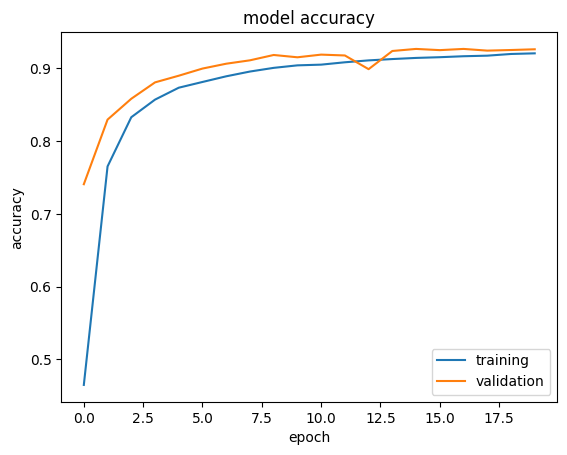

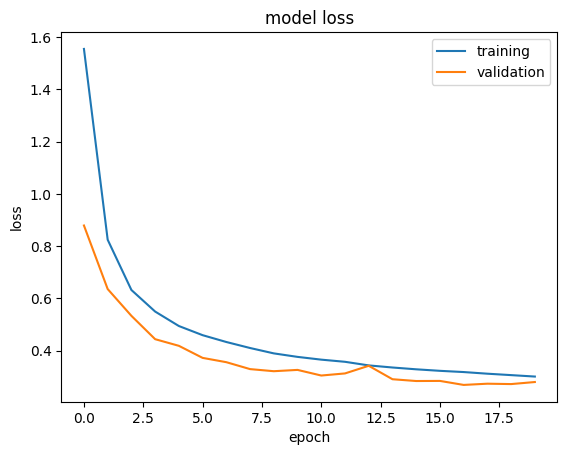

Test loss: 0.326
Test accuracy: 0.912


In [ ]:
#Question #7
#Rewrite the code of the starter model so that it uses the ELU activation function instead of the sigmoid function. Show your code in the less below and rerun the training.
model = Sequential()
model.add(Dense(units=10, activation='elu', input_shape=(image_size,)))

for _ in range(10):
    model.add(Dense(units=10, activation='elu'))

model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [ ]:
#Question #8
#What is the test accuracy of the model using ELU activation? Comment on the results: Is it better or worse than previous models?

The model with ELU activation outperformed previous models with test accuracy of 0.912.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_86 (Dense)            (None, 10)                7850      
                                                                 
 batch_normalization_22 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_87 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_23 (Ba  (None, 10)                40        
 tchNormalization)                                               
                                                                 
 dense_88 (Dense)            (None, 10)                110       
                                                                 
 batch_normalization_24 (Ba  (None, 10)              

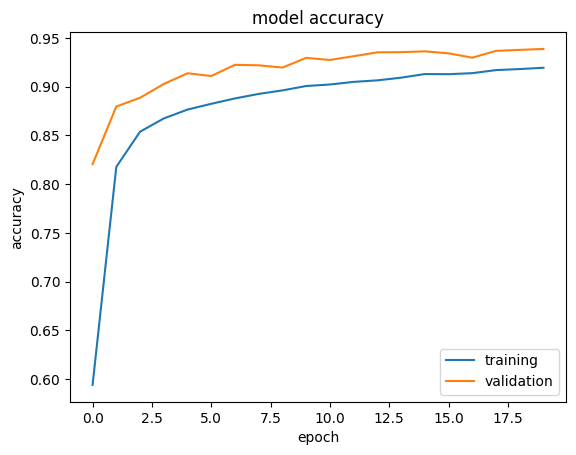

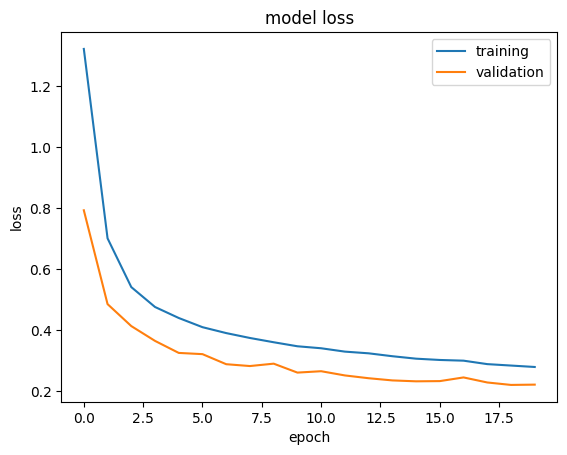

Test loss: 0.274
Test accuracy: 0.924


In [ ]:
#Question #9
#Rewrite the code of the starter model so that it uses your choice of activation function instead of the sigmoid function.
#Insert a layer of batch normalization after each dense layer
#Show your code in the less below and rerun the training.
from tensorflow.keras.layers import BatchNormalization

model = Sequential()
model.add(Dense(units=10, activation='elu', input_shape=(image_size,)))
model.add(BatchNormalization())
for _ in range(10):
    model.add(Dense(units=10, activation='elu'))
    model.add(BatchNormalization())
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)

In [ ]:
#Question #10
#What is the test accuracy of the model using batch normalization ? Comment on the results: Is it better or worse than previous models?

I use ELU activation function as it ourperformed compared to other activation functions in the previous models along with batch normalization.
This model got test accuracy of 0.924 and performed bettern than all previous models.

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_98 (Dense)            (None, 10)                7850      
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_99 (Dense)            (None, 10)                110       
                                                                 
 dropout_1 (Dropout)         (None, 10)                0         
                                                                 
 dense_100 (Dense)           (None, 10)                110       
                                                                 
 dropout_2 (Dropout)         (None, 10)                0         
                                                                 
 dense_101 (Dense)           (None, 10)              

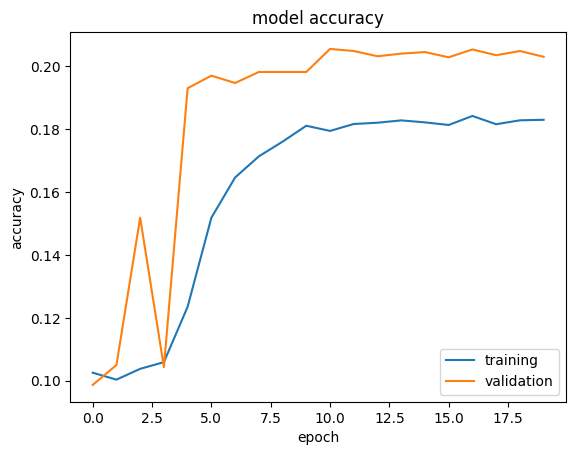

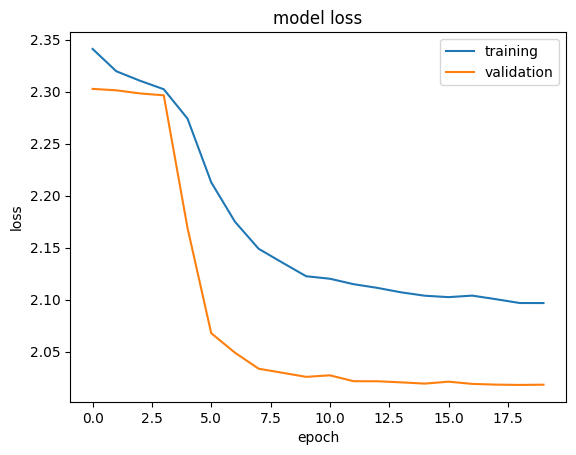

Test loss: 2.0
Test accuracy: 0.207


In [ ]:
#Question #11
#Rewrite the code of the starter model so that it uses your choice of activation function instead of the sigmoid function.
#Insert a layer with 20% dropout after each dense layer
#Show your code in the less below and rerun the training.
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Dense(units=10, activation='elu', input_shape=(image_size,)))
model.add(Dropout(0.2))
for _ in range(10):
    model.add(Dense(units=10, activation='elu'))
    model.add(Dropout(0.2))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer="sgd", loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


In [ ]:
#Question #12
#What is the test accuracy of the model using dropout layers ? Comment on the results: Is it better or worse than previous models?

The model with 20% dropout after each hidden layer with elu activation function got test accuracy 0.207. It shown worst performance compared to all other models.

##**Your own customized model**

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_135 (Dense)           (None, 128)               100480    
                                                                 
 batch_normalization_45 (Ba  (None, 128)               512       
 tchNormalization)                                               
                                                                 
 activation_12 (Activation)  (None, 128)               0         
                                                                 
 dropout_23 (Dropout)        (None, 128)               0         
                                                                 
 dense_136 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_46 (Ba  (None, 64)                256       
 tchNormalization)                                   

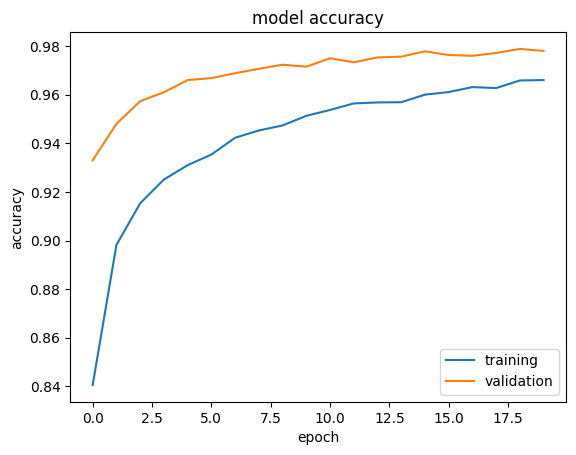

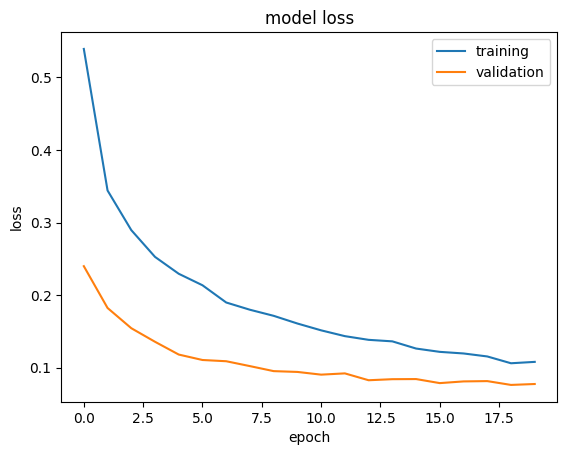

Test loss: 0.0846
Test accuracy: 0.975


In [ ]:
#Question #13
#your turn to improvise
#given the results from the previous models and what you learned in chapter 11, create and train your own model and comment on its performance
#feel free to change the optimizer and anything else you see fit
#Make sure to detail and justify the parameters you selected for your model.
#Show your code below
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation
from tensorflow.keras.optimizers import Adam
neurons = 128
model = Sequential()

model.add(Dense(units=128, input_shape=(image_size,)))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.2))

model.add(Dense(units=64))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.2))

model.add(Dense(units=32))
model.add(BatchNormalization())
model.add(Activation('selu'))
model.add(Dropout(0.2))




model.add(Dense(units=num_classes, activation='softmax'))
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

#Start the training and plot the results
history = model.fit(training_data, training_labels, batch_size=128, epochs=20, verbose=False, validation_split=.1)
plot_training_history(history, model)


I created a model with 3 hidden layers using SELU activation function with units 128,64,32. batch normalization and 20% dropout layers were added after each dense layer to improve generalization. This model achieved 0.975 accuracy and outperformed all the previous models.